# Signals, Sampling & Filtering
---

<div class="alert alert-block alert-info">
This chapter was copied and lightly adapted (mostly code edits) from Paul Gribble's <a href="https://gribblelab.org/teaching/scicomp2020/">Scientific Computing</a> course under a <a href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>. Some of the topics here are more advanced. The goal is to provide you an introduction to this extremely important topic as well as some conceptual and practical understanding. Hence, you may find a lot of value in returning to this chapter in the future, whether to boost your understanding or utilize the code examples provided. 
</div>

Whereas signals in nature (such as sound waves, magnetic fields, hand position, electromyograms (EMG), electroencephalograms (EEG), extra-cellular potentials, etc) vary continuously, often in science we measure these signals by **sampling** them repeatedly over time, at some **sampling frequency**. The resulting collection of measurements is a **discretized** representation of the original continuous signal.

Before we get into **sampling theory** however we should first define some common terms and talk about how signals can be represented both in the **time domain** and in the **frequency domain**.

#### Terminology
- Frequency - number of cycles per unit time (usually seconds)
- Period - how long it takes a signal to go through a full cycle (e.g., 2$\pi$ radians)
- Phase - angular position (we won't discuss phase very much here)

## Time domain representation of signals

This is how you are probably used to thinking about signals, namely how the magnitude of a signal varies over time. So for example a signal $s$ containing a sinusoid with a period $T$ of 0.5 seconds (a frequency of 2 Hz) and a peak-to-peak magnitude $b$ of 2 volts is represented in the time domain $t$ as:

$$ s(t) = \left(\frac{b}{2}\right) \mathrm{sin}\left(wt\right) $$

where

$$ w = \frac{2 \pi}{T} $$

We can visualize the signal by plotting its magnitude as a function of time:

In [1]:
# Standard imports plus SciPy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

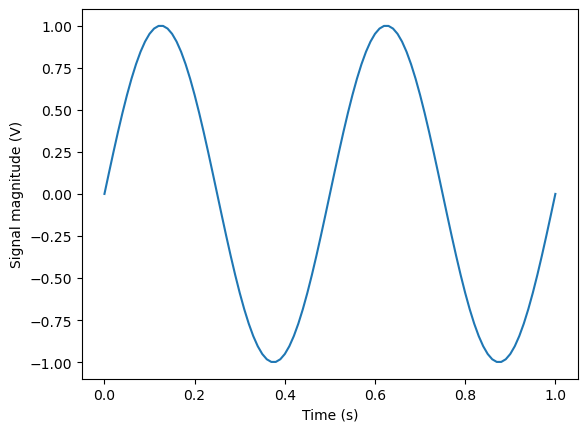

In [2]:
# Define our sine wave
T = 0.5  # period (1 / frequency)
b = 2  # peak-to-peak amplitude
w = 2 * np.pi / T
t = np.linspace(0, 1, 101)
s = b / 2 * np.sin(w * t)

# Plot our sine wave
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal magnitude (V)")
plt.show()

## Frequency domain representation of signals

We can also represent signals in the frequency domain. This requires some understanding of the [Fourier series](http://en.wikipedia.org/wiki/Fourier_series). The idea of the Fourier series is that all periodic signals can be represented by (decomposed into) the sum of a set of pure sines and cosines that differ in frequency and period. See the wikipedia link for lots of details and a helpful animation.

$$ s(t) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left[a_{n}\mathrm{cos}(nwt) + b_{n}\mathrm{sin}(nwt)\right] $$

The coefficients $a_{n}$ and $b_{n}$ define the weighting of the different sines and cosines at different frequencies. In other words these coefficients represent the strength of the different frequency components in the signal.

We can also represent the Fourier series using only sines:

$$ s(t) = \frac{a_{0}}{2} \sum_{n=1}^{\infty} \left[r_{n}\mathrm{cos}(nwt-\phi_{n})\right] $$

Using this formulation we now have **magnitude** coefficients $r_{n}$ and **phase** coefficients $\phi_{n}$. That is, we are representing the original signal $s(t)$ using a sum of sinusoids of different frequencies and phases.

Here is a java applet that lets you play with how sines and cosines can be used to represent different signals: [Fourier Series Applet](http://www.falstad.com/fourier/).


## Fast Fourier transform (FFT)

Given a signal there is a very efficient computational algorithm called the [Fast Fourier transform](http://en.wikipedia.org/wiki/Fast_Fourier_transform) (FFT) for computing the magnitude and phase coefficients. We will not go into the details of this algorithm here, most high level programming languages have a library that includes the FFT algorithm.

Here is a video showing a 100-year-old mechanical computer that does both forward and inverse Fourier transforms:

*   [Harmonic Analyzer (1/4)](https://www.youtube.com/watch?v=NAsM30MAHLg)
*   [Harmonic Analyzer (2/4)](https://www.youtube.com/watch?v=8KmVDxkia_w)
*   [Harmonic Analyzer (3/4)](https://www.youtube.com/watch?v=6dW6VYXp9HM)
*   [Harmonic Analyzer (4/4)](https://www.youtube.com/watch?v=jfH-NbsmvD4)

## Sampling

Before we talk about the FFT and magnitude and phase coefficients, we need to talk about discrete versus continuous signals, and sampling. In theory we can derive a mathematical description of the Fourier decomposition of a continuous signal, as we have done above, in terms of an infinite number of sinusoids. In practice however, signals are not continuous, but are **sampled** at some discrete **sampling rate**.

For example, when we use Optotrak to record the position of the fingertip during pointing experiments, we choose a sampling rate of 200 Hz. This means 200 times per second the measurement instrument samples and records the position of the fingertip. The interval between any two samples is 5 ms. It turns out that the sampling rate used has a specific effect on the number of frequencies used in a discrete Fourier representation of the recorded signals.

The [Shannon-Nyquist sampling theorem](http://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) states that a signal must be sampled at a rate which is at least twice that of its highest frequency component. If a signal contains power at frequencies higher than half the sampling rate, these high frequency components will appear in the sampled data at lower frequencies and will distort the recording. This is known as the problem of [aliasing](http://en.wikipedia.org/wiki/Aliasing).

Let's look at a concrete example that will illustrate this concept. Let's assume we have a signal that we want to sample, and we choose a sampling rate of 4 Hz. This means every 250 ms we sample the signal. According to the Shannon-Nyquist theorem, the maximum frequency we can uniquely identify is half that, which is 2 Hz. This is called the [nyquist frequency](http://en.wikipedia.org/wiki/Nyquist_frequency). Let's look at a plot and see why this is so.

Below we see a solid blue line showing a 2 Hz signal, a magenta dashed line showing a 4 Hz signal, and a green dashed line showing a 8 Hz signal. Now imagine we sample these signals at 2 Hz, indicated by the vertical red lines. Notice that at the sample points (vertical red lines), the 2 Hz, 4 Hz and 8 Hz signals overlap with identical values. This means that on the basis of our 2 Hz samples, we cannot distinguish between frequencies of 2, 4 and 8 Hz. What's more, what this means is that if the signal we are actually sampling at 2 Hz has significant signal power at frequencies above the Nyquist (1 Hz) then the power at these higher frequencies will influence our estimates of the magnitude coefficients corresponding to frequencies below the Nyquist… in other words the high-frequency power will be aliased into the lower frequency estimates.


![signal_aliasing.jpg](signal-aliasing.jpg)


Below is another example taken from the [wikipedia article on aliasing](http://en.wikipedia.org/wiki/Aliasing). Here we have two sinusoids — one at 0.1 Hz (blue) and another at 0.9 Hz (red). We sample both at a sampling rate of 1 Hz (vertical green lines). You can see that at the sample points, both the 0.1 Hz and 0.9 Hz sinusoids "hit" the sample points and thus both would influence our estimates of the power at the 0.1 Hz frequency. Since the sampling rate is 1 Hz, the Nyquist frequency (the maximum frequency we can distinguish) is 0.5 Hz - and so any power in the signal above 0.5 Hz (such as 0.9 Hz) will be aliased down into the lower frequencies (in this case into the 0.1 Hz band).

![signal-aliasing.jpg](signal-aliasing-sines.jpg)

</div>

So the message here is that in advance, before choosing your sampling rate, you should have some knowledge about the highest frequency that you (a) are interested in identifying; and (b) you think is a real component in the signal (as opposed to random noise). In cases where you have no a priori knowledge about the expected frequency content, one strategy is to remove high frequency components _before sampling_. This can be accomplished using low-pass filtering — sometimes called anti-aliasing filters. Once the signal has been sampled, it's too late to perform anti-aliasing.

## Power spectra

Rather than going into the computational details of how magnitude and phase coefficients are estimated (which goes beyond the scope of this course), we will now talk about how to interpret them.

For a given signal, the collection of magnitude coefficients gives a description of the signal in terms of the strength of the various underlying frequency components. For our immediate purposes these magnitude coefficients will be most important to us and we can for the moment set aside the phase coefficients.

Here is an example of a power spectrum for a pure 10 Hz signal, sampled at 100 Hz.

![](signal_spectrum10.jpg)

The magnitude values are zero for every frequency except 10 Hz. We haven't plotted the phase coefficients. The set of magnitude and phase coefficients derived from a Fourier analysis is a complete description of the underlying signal, with one caveat — only frequencies up to the Nyquist are represented. So the idea here is that one can go between the original time-domain representation of the signal and this frequency domain representation of the signal without losing information. As we shall see below in the section on filtering, we can perform operations in the frequency domain and then transform back into the time domain.

Here is some Python code to illustrate these concepts. We construct a one second signal sampled at 1000 Hz that is composed of a 6 Hz, 10 Hz and 13 Hz components. We then use the `fft()` function to compute the Fast Fourier transform, we extract the magnitude information, we set our frequency range (up to the Nyquist) and we plot the **spectrum**:

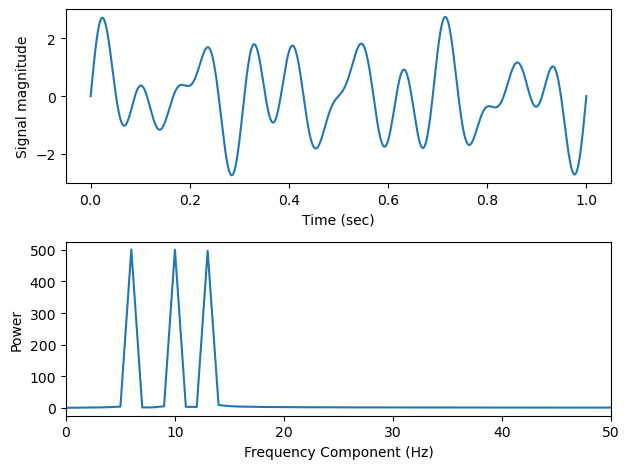

In [3]:
# Create our signal
t = np.linspace(0,1,1000) # 1 second sampled at 1000 Hz
# Create 6, 10, and 13 Hz signals
y = np.sin(2 * np.pi * t * 6) + np.sin(2 * np.pi * t * 10) + np.sin(2 * np.pi * t * 13)

# Set-up our subplots
fig, ax = plt.subplots(2,1)
ax[0].plot(t, y)
ax[0].set_xlabel('Time (sec)')
ax[0].set_ylabel('Signal magnitude')

# Perform the FFT
out = sp.fft.rfft(y) # compute the FFT (rfft is fft on real-valued data and is preferred for speed)
mag = np.abs(out)  # extract the magnitude information
freqs = sp.fft.rfftfreq(len(y), d=1/1000) # compute the frequency range; d is sample spacing

# Plot the filtered signal
ax[1].plot(freqs, mag) # plot the magnitude spectrum up to the Nyquist
ax[1].set_xlim([0, 50]) # Zoom in on the first 50 Hz for visualization purposes 
ax[1].set_xlabel('Frequency Component (Hz)')
ax[1].set_ylabel('Power')

plt.tight_layout()

We can see that the power spectrum has revealed peaks at 6, 10 and 13 Hz - which we know is correct, since we designed our signal from scratch.

Typically however signals in the real world that we record are not pure sinusoids, but contain random noise. Noise can originate from the actual underlying process that we are interested in measuring, and it can also originate from the instruments we use to measure the signal. For noisy signals, the FFT taken across the whole signal can be noisy as well, and can make it difficult to see peaks.

## Power Spectral Density

One solution is instead of performing the FFT on the entire signal all at once, to instead, split the signal into chunks, take the FFT of each chunk, and then average these spectra to come up with a smoother spectrum. This can be accomplished using a [power spectral density](http://www.mathworks.com/help/signal/ref/dspdata.psd.html) function. In Python in the SciPy package there is a function scipy.signal.welch() to accomplish this. We won’t go into the mathematical details or the theoretical considerations (relating to stochastic processes) but for now suffice it to say that the psd can often give you a better estimate of the power at different frequencies compared to a “plain” FFT, in the presence of random noise.

Here is an example of plotting the power spectral density of a signal. We construct a 12 Hz signal at 1000 Hz sampling rate, and we add some random noise on top:

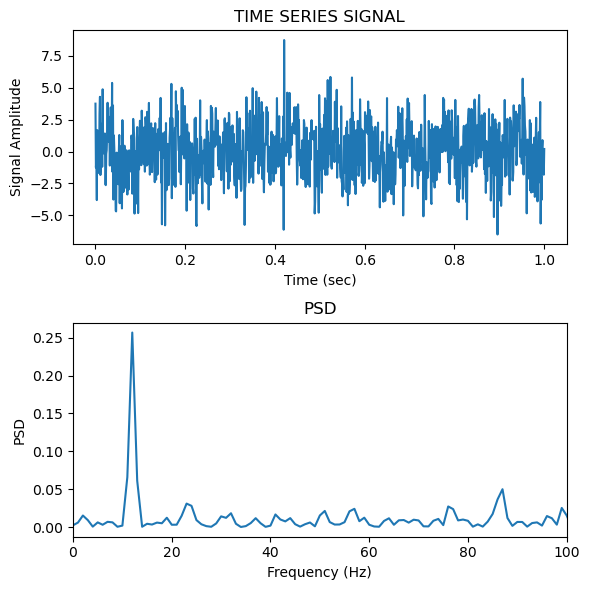

In [4]:
# Construct signal
t = np.linspace(0,1,1000)
y = np.sin(2 * np.pi * t * 12)
yn = y + np.random.randn(len(y)) * 2  # add noise

# Create subplots
fig,ax = plt.subplots(2,1, figsize=(6,6))
ax[0].plot(t,yn)
ax[0].set_xlabel('Time (sec)')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('TIME SERIES SIGNAL')

# Compute power spectral density
freqs, psd = sp.signal.welch(yn, fs=1000, nperseg=1000)

ax[1].plot(freqs,psd)
ax[1].set_xlim([0,100])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('PSD')
ax[1].set_title('PSD')
plt.tight_layout()

In the Figure above you can see that the peak at 12 Hz stands nicely above all the noise in the power spectral density estimate (bottom panel).

We have been ignoring the **phase** of the signal here, but just like the magnitude coefficients over frequencies, we can recover the phase coefficients of the signal as well.

## Decibel scale

The decibel (dB) scale is a ratio scale. It is commonly used to measure sound level but is also widely used in electronics and signal processing. The dB is a logarithmic unit used to describe a ratio. You will often see power spectra displayed in units of decibels.

The difference between two sound levels (or two power levels, as in the case of the power spectra above), is defined to be:

$$ 20 \text{log}_{10} \left(\frac{P_{2}}{P_{1}}\right)dB $$

Thus when $P_{2}$ is twice as large as $P_{1}$, then the difference is about 6 dB. When $P_{2}$ is 10 times as large as $P_{1}$, the difference is 20 dB. A 100 times difference is 40 dB.

An advantage of using the dB scale is that it is easier to see small signal components in the presence of large ones. In other words large components don't visually swamp small ones.

Since the dB scale is a ratio scale, to compute absolute levels one needs a reference — a zero point. In acoustics this reference is usually 20 micropascals — about the limit of sensitivity of the human ear.

For our purposes in the absence of a meaningful reference we can use 1.0 as the reference (i.e. as $P_{1}$ in the above equation).

## Spectrogram

Often there are times when you may want to examine how the power spectrum of a signal (in other words its frequency content) changes over time. In speech acoustics for example, at certain frequencies, bands of energy called [formants](http://en.wikipedia.org/wiki/Formant) may be identified, and are associated with certain speech sounds like vowels and vowel transitions. It is thought that the neural systems for human speech recognition are tuned for identification of these formants.

Essentially a spectrogram is a way to visualize a series of power spectra computed from slices of a signal over time. Imagine a series of single power spectra (frequency versus power) repeated over time and stacked next to each other over a time axis.

Matplotlib has a built-in function called `.pyplot.specgram()` that will generate a spectrogram. In the figure below, power is color-coded such that cool colors (blues) represent low power and hot colors (reds) represent high power. 

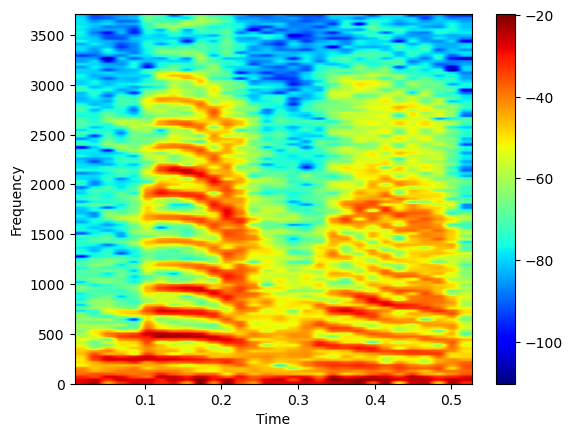

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

mtlb = np.loadtxt('mtlb.txt')
Fs = 7418

fig, ax = plt.subplots()
_, _, _, cax = ax.specgram(mtlb, 256, Fs=Fs, cmap='jet')
ax.set_xlabel("Time")
ax.set_ylabel("Frequency")
fig.colorbar(cax)
plt.show()

## Inverse Fast Fourier transform (IFFT)

Once we have the FFT of a signal, which represents the signal in the frequency domain as a series of magnitude and phase coefficients, we can reconstruct the signal in the time-domain using the inverse fast fourier transform (IFFT). Here is a concrete example:


/Users/hyosubkim/opt/anaconda3/envs/jupyter_books/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


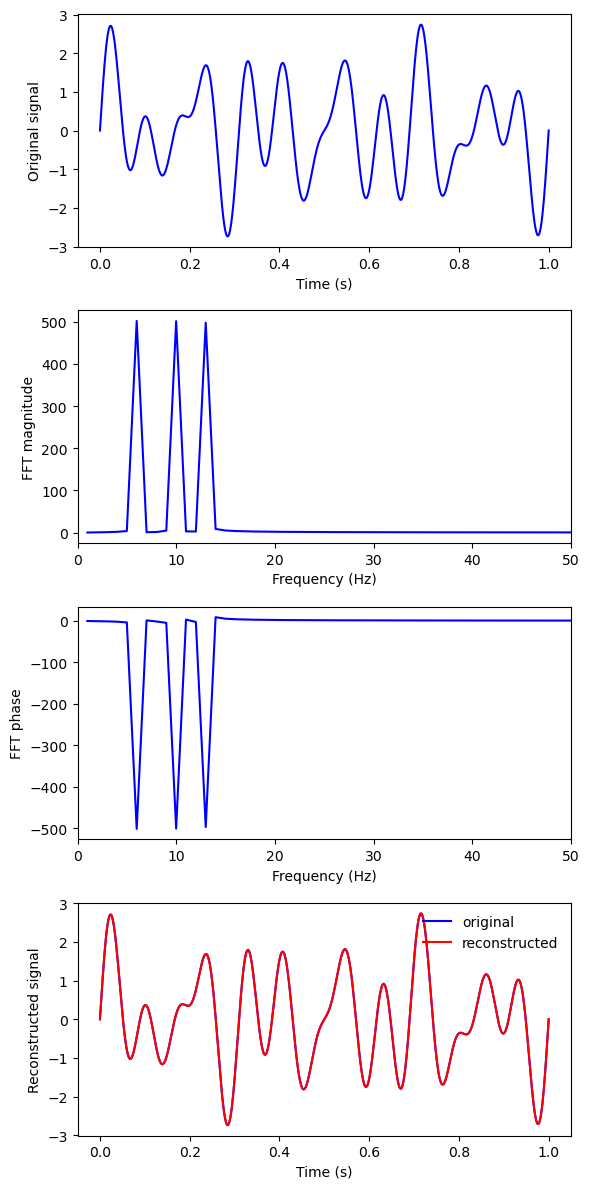

In [6]:
# Construct signal and plot in the time domain
fig, axs = plt.subplots(4, 1, figsize=(6, 12))
t = np.linspace(0, 1, 1001)
y = np.sin(2 * np.pi * t * 6) + np.sin(2 * np.pi * t * 10) + np.sin(2 * np.pi * t * 13)
axs[0].plot(t, y, "b")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Original signal")

# Compute FFT and plot the magnitude spectrum
F = np.fft.fft(y)
N = len(t)  # Number of samples
dt = 0.001  # Inter-sample time difference
w = np.fft.fftfreq(N, dt)  # Gives list of frequencies for FFT
ipos = np.where(w > 0)
freqs = w[ipos]  # Only look at positive fequencies
mags = np.abs(F[ipos])  # Magnitude component
phase = np.imag(F[ipos])  # Phase component

axs[1].plot(freqs, mags, "b")
axs[1].set_xlim([0, 50])  # Zoom in on 0-50 Hz freqs
axs[1].set_ylabel("FFT magnitude")
axs[1].set_xlabel("Frequency (Hz)")

axs[2].plot(freqs, phase, "b")
axs[2].set_xlim([0, 50])  # Zoom in on 0-50 Hz freqs
axs[2].set_ylabel("FFT phase")
axs[2].set_xlabel("Frequency (Hz)")

yr = np.fft.ifft(F)
axs[3].plot(t, y, "b", label="original")
axs[3].plot(t, yr, "r", label="reconstructed")
axs[3].set_xlabel("Time (s)")
axs[3].set_ylabel("Reconstructed signal")
axs[3].legend(frameon=False)
fig.tight_layout()


You can see above that the original signal is reconstructed in its entirety, simply on the basis of its frequency domain representation (the FFT).

## Filtering

We can use this property of signals to filter them. Below I take our original signal containing frequency components at 6, 10 and 13 Hz, I take the FFT, and then I set the values in the FFT corresponding to the frequency peaks of 10 and 13 Hz, to zero (and I leave the value corresponding to the frequency of 6 Hz unchanged). I then reconstruct a signal based on this altered frequency domain representation, using `ifft()`, and plot the resulting signal. What you can see is that by setting the coefficients corresponding to 10 and 13 Hz to zero, I essentially **filtered out** all of the power in the signal at those frequencies. The reconstructed signal now only has power at 6 Hz (the red line, it looks like a pure 6 Hz sinusoid).


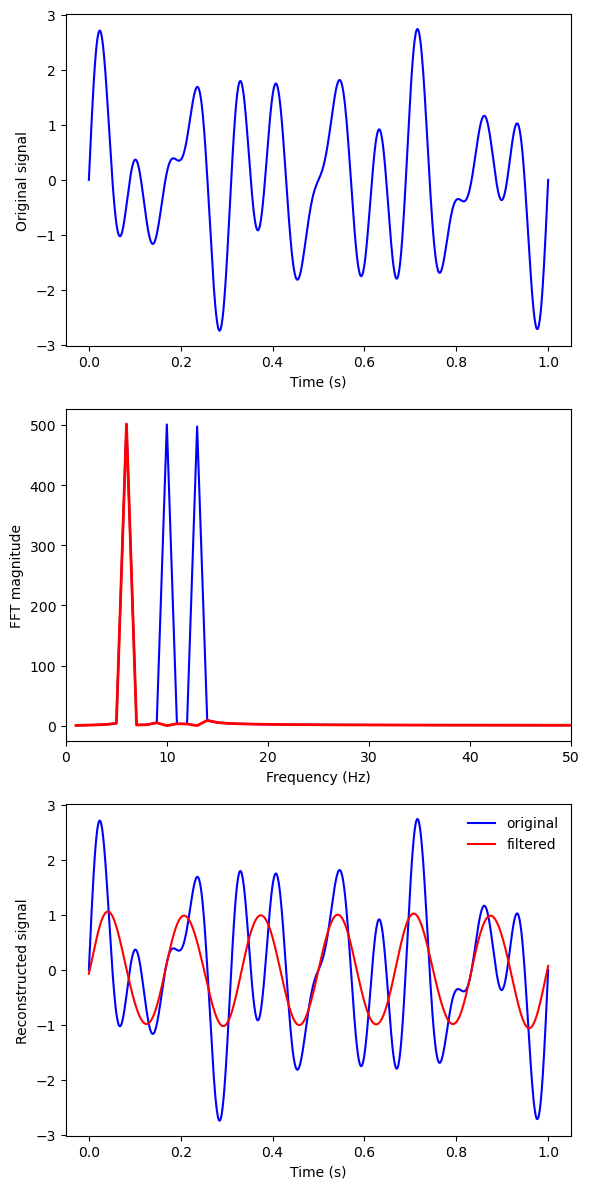

In [7]:
# Construct signal and plot in the time domain
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
t = np.linspace(0, 1, 1001)
y = np.sin(2 * np.pi * t * 6) + np.sin(2 * np.pi * t * 10) + np.sin(2 * np.pi * t * 13)
axs[0].plot(t, y, "b")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Original signal")

# Compute FFT and plot the magnitude spectrum
F = np.fft.fft(y)
N = len(t)  # Number of samples
dt = 0.001  # Inter-sample time difference
w = np.fft.fftfreq(N, dt)  # Gives list of frequencies for FFT
ipos = np.where(w > 0)
freqs = w[ipos]  # Only look at positive fequencies
mags = np.abs(F[ipos])  # Magnitude component
phase = np.imag(F[ipos])  # Phase component

ip = np.where(F > 5)[0]  # Find peaks in FFT
Fs = np.copy(F)  # Make a copy of the signal FFT
Fs[ip[[2, 3]]] = 0  # Set peaks corresponding to 
yf = np.fft.ifft(Fs)  # reconstruct

Ff = np.copy(F)  # make a copy of the signal FFT
Ff[ip[[1, 2, 3, 4]]] = 0  # set 10Hz and 13Hz peaks to zero
magsf = np.abs(Ff[ipos])  # magnitude component
phasef = np.imag(Ff[ipos])  # phase component
yf = np.fft.ifft(Ff)  # reconstruct

axs[1].plot(freqs, mags, "b", label="original")
axs[1].plot(freqs, magsf, "r", label="filtered", linewidth=2)
axs[1].set_xlim([0, 50])  # Zoom in on 0-50 Hz freqs
axs[1].set_ylabel("FFT magnitude")
axs[1].set_xlabel("Frequency (Hz)")

axs[2].plot(t, y, "b", label="original")
axs[2].plot(t, yf, "r", label="filtered")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Reconstructed signal")
axs[2].legend(frameon=False)
fig.tight_layout()


This is a fairly simple-minded way of filtering a signal, but it illustrates the underlying concepts. There are an entire range of algorithms for filtering that are designed to manipulate frequency ranges, and they differ in a number of respects including how quickly they alter the frequencies in question, how they affect the phase information in the signal, and a number of other things we won't go into here. There are entire signal processing textbooks oriented around this topic, so if you're interested in details, I can point you towards some good sources.

Here is a short summary of different kinds of filters, and some terminology.

*   **low-pass filters** pass low frequencies without change, but attenuate (i.e. reduce) frequencies above the **cutoff frequency**
*   **high-pass filters** pass high frequencies and attenuate low frequencies, below the cutoff frequency
*   **band-pass filters** pass frequencies within a **pass band** frequency range and attenuate all others
*   **band-stop filters** (sometimes called **band-reject filters** or **notch filters**) attenuate frequencies within the **stop band** and pass all others

### Characterizing filter performance

A useful way of characterizing a filter's performance is in terms of the ratio of the amplitude of the output to the input (the amplitude ratio AR or gain), and the phase shift (\(\phi\)) between the input and output, as functions of frequency. A plot of the amplitude ratio and phase shift against frequency is called a [Bode plot](http://en.wikipedia.org/wiki/Bode_plot).

The **pass band** of a filter is the range of frequencies over which signals pass with no change. The **stop band** refers to the range of frequencies over which a filter attenuates signals. The **cutoff frequency** or **corner frequency** of a filter is used to describe the transition point from the pass band to the reject band. Since this transition cannot occur instantaneously it is usually defined to be the point at which the filter output is equal to -6 dB of the input in the pass band. The cutoff frequency is sometimes called the -6 dB point or the half-power point since -6 dB corresponds to half the signal power. The **roll-off** refers to the rate at which the filter attenuates the input after the cutoff point. When the roll-off is linear it can be specified as a specific slope, e.g. in terms of dB/decade or dB/octave (an octave is a doubling in frequency).

Let's look at some examples of filter characteristics.

<div>
<center><<img src="signal_bode.jpg" width="400"></center></div>
<!-- ![](signal_bode.jpg) -->

Here the blue trace shows the power spectrum for the unfiltered signal. The red trace shows a lowpass-filtered version of the signal with a cutoff frequency of 30 Hz. The green trace shows a low-pass with a cutoff frequency of 130 Hz. Also notice that the roll-off of the 30 Hz lowpass is not as great as for the 130 Hz lowpass, which has a higher roll-off.

Here are the corresponding signals shown in the time-domain:

<div>
    <center><img src="signal_bodetime.jpg" width=400></center>
    
<!-- ![](signal_bodetime.jpg) -->

So we see a very good example of how low-pass filtering can be used very effectively to filter out random noise. Key is the appropriate choice of cut-off frequency.

### Common Filters

There are many different designs of filters, each with their own characteristics (gain, phase and delay characteristics). Some common types:

*   **Butterworth Filters** have frequency responses which are maximally flat and have a monotonic roll-off. They are well behaved and this makes them very popular choices for simple filtering applications. For example in my work I use them exlusively for filtering physiological signals. MATLAB has a built-in function called `butter()` that implements the butterworth filter.
*   **Tschebyschev Filters** provide a steeper monotonic roll-off, but at the expense of some ripple (oscillatory noise) in the pass-band.
*   **Cauer Filters** provide a sharper roll-off still, but at the expense of ripple in both the pass-band and the stop-band, and reduced stop-band attenuation.
*   **Bessel Filters** have a phase-shift which is linear with frequency in the pass-band. This corresponds to a pure delay and so Bessel filters preserve the shape of the signal quite well. The roll-off is monotonic and approaches the same slope as the Butterworth and Tschebyschev filters at high frequencies although it has a more gentle roll-off near the corner frequency.

### Filter order

In [filter design](http://en.wikipedia.org/wiki/Filter_design) the **order** of a filter is one characteristic that you might come across. Technically the definition of the filter order is the highest exponent in the [z-domain](http://en.wikipedia.org/wiki/Z-transform) ([transfer function](http://en.wikipedia.org/wiki/Transfer_function)) of a [digital filter](http://en.wikipedia.org/wiki/Digital_filter). That's helpful isn't it! (not) Another way of describing filter order is the degree of the approximating polynomial for the filter. Yet another way of describing it is that increasing the filter order increases roll-off and brings the filter closer to the ideal response (i.e. a "brick wall" roll-off).

Practically speaking, you will find that a second-order butterworth filter provides a nice sharp roll-off without too much undesirable side-effects (e.g. large time lag, ripple in the pass-band, etc).

See [this section](http://en.wikipedia.org/wiki/Low-pass_filter#Continuous-time_low-pass_filters) of the wikipedia page on low-pass filters for another description.

### Python code for filtering

Below is Python code for implementing low-pass, high-pass, band-pass, and band-stop filters using a Butterworth design (more on these terms below).

In [8]:
def lowpass(y, samprate, cutoff, order=2):
    w = cutoff / (samprate / 2) # Normalize the cutoff frequency
    b, a = sp.signal.butter(N=order, Wn=w, btype='lowpass') # get the filter coefficients
    yf = sp.signal.filtfilt(b, a, y) # perform the filtering
    return yf

def highpass(y, samprate, cutoff, order=2):
    w = cutoff / (samprate / 2) # Normalize the cutoff frequency
    b, a = sp.signal.butter(N=order, Wn=w, btype='highpass') # get the filter coefficients
    yf = sp.signal.filtfilt(b, a, y) # perform the filtering
    return yf

def bandpass(y, samprate, cutoffs, order=2):
    cutoffs = np.array(cutoffs)
    w = cutoffs / (samprate / 2) # Normalize the cutoff frequencies
    b, a = sp.signal.butter(N=order, Wn=w, btype='bandpass') # get the filter coefficients
    yf = sp.signal.filtfilt(b, a, y) # perform the filtering
    return yf

def bandstop(y, samprate, cutoffs, order=2):
    cutoffs = np.array(cutoffs)
    w = cutoffs / (samprate / 2) # Normalize the cutoff frequencies
    b, a = sp.signal.butter(N=order, Wn=w, btype='bandstop') # get the filter coefficients
    yf = sp.signal.filtfilt(b, a, y) # perform the filtering
    return yf

### Application: high-frequency noise and taking derivatives

One of the characteristics of just about any experimental measurement is that the signal that you measure with your instrument will contain a combination of true signal and "noise" (random variations in the signal). A common approach is to take many measurements and average them together. This is what is commonly done in EEG/ERP studies, in EMG studies, with spike-triggered averaging, and many others. The idea is that if the "real" part of the signal is constant over trials, and the "noise" part of the signal is random from trial to trial, then averaging over many trials will average out the noise (which is sometimes positive, sometimes negative, but on balance, zero) and what remains will be the true signal.

You can imagine however that there are downsides to this approach. First of all, it requires that many, many measures be taken so that averages can be computed. Second, there is no guarantee that the underlying "true" signal will in fact remain constant over those many measurements. Third, one cannot easily do analyses on single trials, since we have to wait for the average before we can look at the data.

One solution is to use signal processing techniques such as **filtering** to separate the noise from the signal. A limitation of this technique however is that when we apply a filter (for example a low-pass filter), we filter out **all** power in the signal above the cutoff frequency — whether "real" signal or noise. This approach thus assumes that we are fairly certain that the power above our cutoff is of no interest to us.

One salient reason to low-pass filter a signal, and remove high-frequency noise, is for cases in which we are interested in taking the temporal derivative of a signal. For example, let's say we have recorded the position of the fingertip as a subject reaches from a start position on a tabletop, to a target located in front of them on a computer screen. Using a device like Optotrak we can record the (x, y, z) coordinates of the fingertip at a sampling rate of 200 Hz. Below is an example using simulated data of such a recording

In the cell below, we create the simulated data:

In [9]:
# Simulate "position" signal with some noise 
t = np.linspace(0, 600, 601)
mu = 250
sigma = 25
x_dot = 2 * np.exp((t - mu)**2 / (-2 * sigma**2))
pos = np.cumsum(x_dot) + np.random.random(size=len(t)) * 0.25

Next, we plot the data:

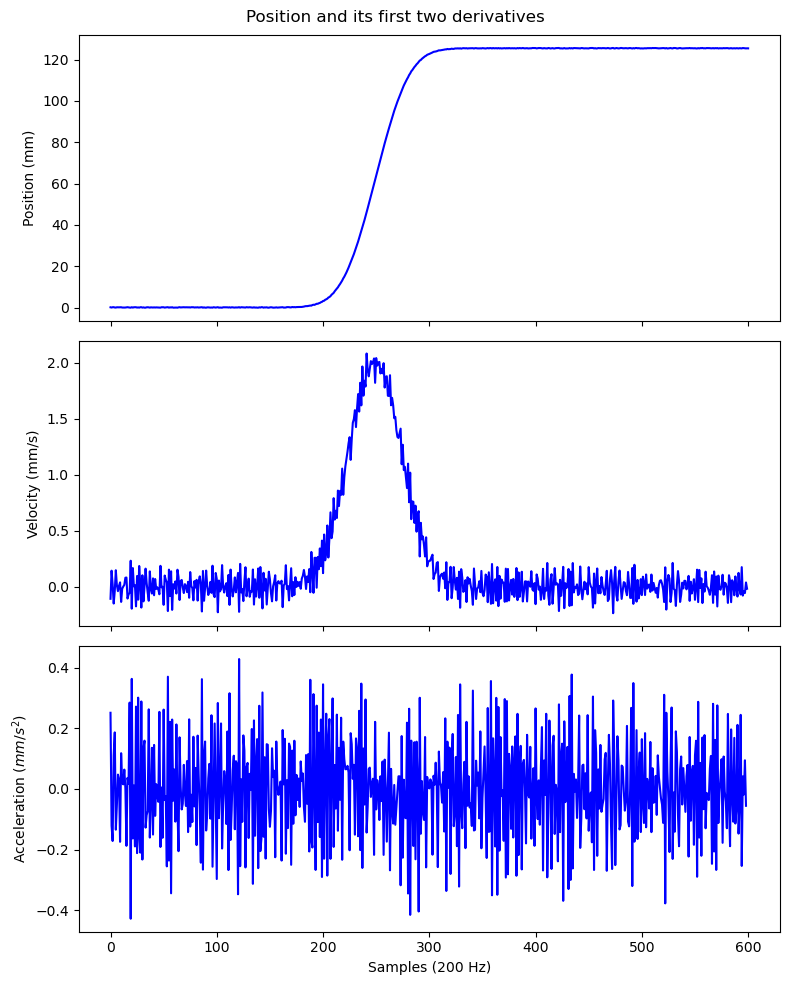

In [10]:
# Plot unfiltered signal and derivatives
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
axs[0].plot(t, pos, c="b")
axs[1].plot(t[0:-1], np.diff(pos), c="b")
axs[2].plot(t[0:-2], np.diff(np.diff(pos)), c="b")

axs[0].set_ylabel("Position (mm)")
axs[1].set_ylabel("Velocity (mm/s)")
axs[2].set_ylabel("Acceleration ($mm/s^2$)")
axs[2].set_xlabel("Samples (200 Hz)")

fig.suptitle("Position and its first two derivatives")
plt.tight_layout()

The top panel shows position in one coordinate over time. The middle panel shows the result of taking the derivative of the position signal to obtain velocity. I have simply used the `diff()` function here to obtain a numerical estimate of the derivative, taking the forward difference. Note how much noisier it looks than the position signal. Finally the bottom panel shows the result of taking the derivative of the velocity signal, to obtain acceleration. It is so noisy one cannot even see the peaks in the acceleration signal, they are completely masked by noise.

What is happening here is that small amounts of noise in the position signal are amplified each time a derivative is taken. One solution is to **low-pass filter** the position signal. The choice of the cutoff frequency is key — too low and we will decimate the signal itself, and too high and we will not remove enough of the high frequency noise. It happens that we are fairly certain in this case that there isn't much real signal power above 12 Hz for arm movements. Here is what it looks like when we low-pass filter the position signal at a 12 Hz cutoff frequency:

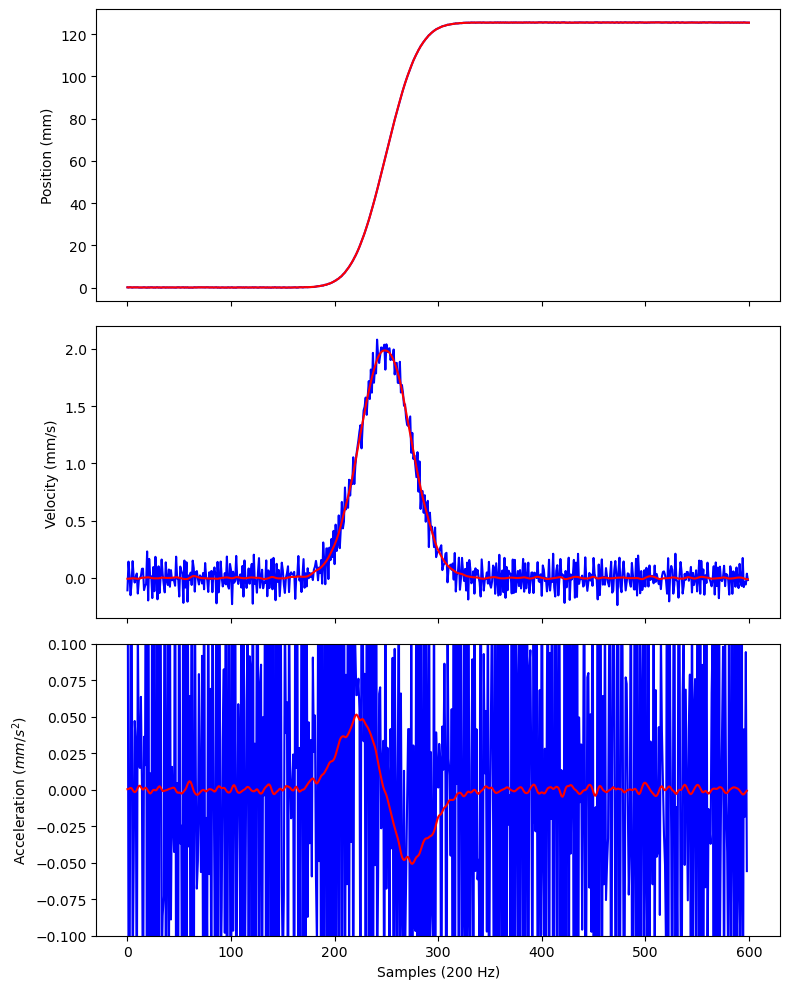

In [11]:
# Low-pass filter position signal
pos_filt = lowpass(pos, 200, 12)

# Plot unfiltered and filtered signals together
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
axs[0].plot(t, pos, c="b")
axs[0].plot(t, pos_filt, c="r")
axs[1].plot(t[0:-1], np.diff(pos), c="b")
axs[1].plot(t[0:-1], np.diff(pos_filt), c="r")
axs[2].plot(t[0:-2], np.diff(np.diff(pos)), c="b")
axs[2].plot(t[0:-2], np.diff(np.diff(pos_filt)), c="r")

axs[0].set_ylabel("Position (mm)")
axs[1].set_ylabel("Velocity (mm/s)")
axs[2].set_ylabel("Acceleration ($mm/s^2$)")
axs[2].set_ylim([-0.1, 0.1])
axs[2].set_xlabel("Samples (200 Hz)")
plt.tight_layout()

What you can see is that for the position over time, the filtered version (shown in red) doesn't differ that much, at least not visibly, from the unfiltered version (in blue). The velocity and acceleration traces however look vastly different. Differentiating the filtered position signal yields a velocity trace (shown in red in the middle panel) that is way less noisy than the original version. Taking the derivative again of this new velocity signal yields an acceleration signal (shown in red in the bottom panel) that is actually usable. The original version (shown in blue) is so noisy it overwhelms the entire panel. Note the scale change on the ordinate.

## Quantization

Converting an analog signal to a digital form involves the quantization of the analog signal. In this procedure the range of the input variable is divided into a set of class intervals. Quantization involves the replacement of each value of the input variable by the nearest class interval centre.

Another way of saying this is that when sampling an analog signal and converting it to digital values, one is limited by the precision with which one can represent the (analog) signal digitally. Usually a piece of hardware called an analog-to-digital (A/D) board is the thing that performs this conversion. The range of A/D boards are usually specified in terms of **bits**. For example a 12-bit A/D board is capable of specifying $2^{12}=4096$ unique values. This means that a continuous signal will be represented using only 4096 possible values. A 16-bit A/D board would be capable of using $2^{16}=65,536$ different values. Obviously the higher the better, in terms of the resolution of the underlying digital representation. Often however in practice, higher resolutions come at the expense of lower sampling rates.

As an example, let's look at a continuous signal and its digital representation using a variety of (low) sample resolutions:


<center><img src="signal_quantization.jpg" width="400"></center>


Here we see as the number of possible unique values increases, the digital representation of the underlying continuous signal gets more and more accurate. Also notice that in general, quantization adds noise to the representation of the signal.

It is also important to consider the amplitude of the sampled signal compared to the range of the A/D board. In other words, if the signal you are sampling has a very small amplitude compared to the range of the A/D board then essentially your sample will only be occupying a small subset of the total possible values dictated by the resolution of the A/D board, and the effects of quantization will be greatly increased.

For example, let's say you are using an A/D board with 12 bits of resolution and an input range of +/- 5 Volts. This means that you have $2^{12}=4096$ possible values with which to characterize a signal that ranges maximally over 10 Volts. If your signal is very small compared to this range, e.g. if it only occupies 25 millivolts, then the A/D board is only capable of using $0.0025/10*4096 = 10$ (ten) unique values to characterize your signal! The resulting digitized characterization of your signal will not be very smooth.

Whenever possible, amplify your signal to occupy the maximum range of the A/D board you're using. Of course the trick is always to amplify the signal without also amplifying the noise!

## Sources of noise

It is useful to list a number of common sources of noise in physiological signals:

*   **Extraneous Signal Noise** arises when a recording device records more than one signal — i.e. signals in addition to the one you as an experimenter are interested in. It's up to you to decide which is signal and which is noise. For example, electrodes placed on the chest will record both ECG and EMG activity from respiratory muscles. A cardiologist might consider the ECG signal and EMG noise, while a respiratory physiologist might consider the EMG signal and the ECG noise.
*   **1/f Noise**: Devices with a DC response sometimes show a low frequency trend appearing on their output even though the inputs don't change. EEG systems and EOG systems often show this behaviour. Fourier analyses show that the amplitude of this noise increases as frequency decreases.
*   **Power or 60 Hz Noise** is interference from 60 Hz AC electrical power signals. This is one of the most common noise sources that experimental neurophysiologists have to deal with. Often we find, for example, on hot days when the air conditioning in the building is running, we see much more 60 Hz noise in our EMG signals than on other days. Some neurophysiologists like to do their recordings late at night or on weekends when there is minimal activity on the electrical system in their building.
*   **Thermal Noise** arises from the thermal motion of electrons in conductors, is always present and determines the theoretical minimum noise levels for a device. Thermal noise is white (has a Gaussian probability distribution) and thus has a flat frequency content — equal power across all frequencies.

  This <span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/Text" rel="dct:type">work</span> is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/)  
[![Creative Commons License](http://i.creativecommons.org/l/by/4.0/80x15.png)](http://creativecommons.org/licenses/by/4.0/)  
</div>